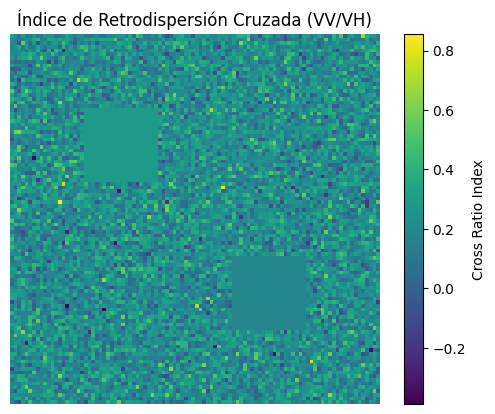

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Cargar las bandas VV y VH
with rasterio.open('VV.tif') as vv_src:
    vv = vv_src.read(1)
    profile = vv_src.profile

with rasterio.open('VH.tif') as vh_src:
    vh = vh_src.read(1)

# Evitar divisiones por cero
epsilon = 1e-10
cross_ratio = np.log10((vv + epsilon) / (vh + epsilon))

# Guardar el índice como un nuevo raster
profile.update(dtype=rasterio.float32, count=1)
with rasterio.open('cross_ratio.tif', 'w', **profile) as dst:
    dst.write(cross_ratio.astype(rasterio.float32), 1)

# Visualizar el resultado
plt.imshow(cross_ratio, cmap='viridis')
plt.colorbar(label='Cross Ratio Index')
plt.title('Índice de Retrodispersión Cruzada (VV/VH)')
plt.axis('off')
plt.show()
